# Here we have a csv file named 'matches.csv' which contains all the Indian Premier League (IPL) matches played between the years 2008 to 2019. In this project, we are interested in the performance of the team Kolkata Knight Riders (KKR). We will perform some exploratory data analytic methods to try to gain some insights into the data regarding this purpose.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
matches = pd.read_csv('D:\\Data Science Projects\\IPL 2008-2019\\matches.csv')
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [3]:
matches=matches.set_index('id')

In [4]:
def abbreviate(a):
    '''This function takes the full name of an IPL team as input and abbreviates it by the shorter name which is actually used in the IPL format.'''
    try:
        if a=="Sunrisers Hyderabad":
            return "SRH"
        else:
            st=""
            for i in a:
                if i.isupper()==True:
                    st+=i
            return st
    except:
        return "Unknown"

In [5]:
matches['team1']=matches['team1'].apply(abbreviate)
matches['team2']=matches['team2'].apply(abbreviate)
matches['toss_winner']=matches['toss_winner'].apply(abbreviate)
matches['winner']=matches['winner'].apply(abbreviate)

In [6]:
matches=matches.drop(['date', 'result', 'dl_applied', 'player_of_match', 'venue', 'umpire1', 'umpire2', 'umpire3'], axis=1)
matches.head()

,season,city,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets
id,,,,,,,,,
1,2017,Hyderabad,SRH,RCB,RCB,field,SRH,35,0
2,2017,Pune,MI,RPS,RPS,field,RPS,0,7
3,2017,Rajkot,GL,KKR,KKR,field,KKR,0,10
4,2017,Indore,RPS,KXIP,KXIP,field,KXIP,0,6
5,2017,Bangalore,RCB,DD,RCB,bat,RCB,15,0


# Having taken a look at the original dataframe and obtained a general idea about its structure and content, we now proceed to filter the KKR matches which we are mainly interested in.

In [7]:
#Filtering the KKR matches
kkr_matches=matches[(matches['team1']=='KKR')|(matches['team2']=='KKR')].copy()
kkr_matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 3 to 11347
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   season          178 non-null    int64 
 1   city            177 non-null    object
 2   team1           178 non-null    object
 3   team2           178 non-null    object
 4   toss_winner     178 non-null    object
 5   toss_decision   178 non-null    object
 6   winner          178 non-null    object
 7   win_by_runs     178 non-null    int64 
 8   win_by_wickets  178 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 13.9+ KB


In [8]:
kkr_matches.head()

,season,city,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets
id,,,,,,,,,
3,2017,Rajkot,GL,KKR,KKR,field,KKR,0,10
7,2017,Mumbai,KKR,MI,MI,field,MI,0,4
11,2017,Kolkata,KXIP,KKR,KKR,field,KKR,0,8
14,2017,Kolkata,KKR,SRH,SRH,field,KKR,17,0
18,2017,Delhi,DD,KKR,DD,bat,KKR,0,4


In [9]:
conditions = [
    (kkr_matches['toss_winner']=='KKR') & (kkr_matches['toss_decision']=='bat'),
    (kkr_matches['toss_winner']!='KKR') & (kkr_matches['toss_decision']!='bat'),
    (kkr_matches['toss_winner']=='KKR') & (kkr_matches['toss_decision']!='bat'),
    (kkr_matches['toss_winner']!='KKR') & (kkr_matches['toss_decision']=='bat')
]

values = ['Defending', 'Defending', 'Chasing', 'Chasing']

kkr_matches['Type'] = np.select(conditions, values)

kkr_matches.head()


,season,city,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,Type
id,,,,,,,,,,
3,2017,Rajkot,GL,KKR,KKR,field,KKR,0,10,Chasing
7,2017,Mumbai,KKR,MI,MI,field,MI,0,4,Defending
11,2017,Kolkata,KXIP,KKR,KKR,field,KKR,0,8,Chasing
14,2017,Kolkata,KKR,SRH,SRH,field,KKR,17,0,Defending
18,2017,Delhi,DD,KKR,DD,bat,KKR,0,4,Chasing


In [10]:
a = kkr_matches.groupby(by='season').size().rename('Matches_played')
b=kkr_matches.groupby(by='season')['winner'].apply(lambda x: (x=='KKR').sum()).rename('Won')
c=pd.concat([a,b],axis=1)
c["%_won"]=round(c['Won']*100/c['Matches_played'])
c

,Matches_played,Won,%_won
season,,,
2008,13,6,46.0
2009,13,3,23.0
2010,14,7,50.0
2011,15,8,53.0
2012,17,12,71.0
2013,16,6,38.0
2014,16,11,69.0
2015,13,7,54.0
2016,15,8,53.0


In [11]:
c['Season'] = c.index
overall_win_percent = round(((c['Won'].sum())*100)/(c['Matches_played'].sum()))
overall_win_percent

52

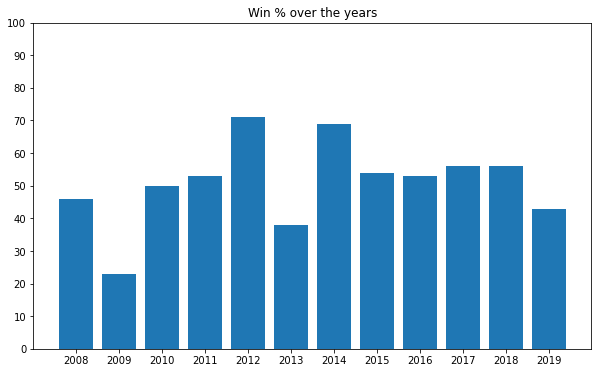

In [12]:
c=c.drop(['Matches_played', 'Won'],axis=1)
plt.figure(figsize=[10,6])
ax1 = plt.subplot()
ax1.set_xticks(c['Season'])
ax1.set_ylim([0,100])
ax1.set_yticks([i*10 for i in range(0,11)])
plt.bar(c['Season'], c['%_won'])
plt.title("Win % over the years")
plt.show()

# So KKR has an overall win percentage of 52. Looking at the bar chart above, we see that KKR has an average win record, around 50% wins for most seasons. 2012 and 2014 have been the best years for this franchise, where they managed to convert about 70% matches to the full point.

In [13]:
p=kkr_matches.groupby(by='Type').size().rename('Matches_played')
p
q=kkr_matches.groupby(by='Type')['winner'].apply(lambda x: (x=='KKR').sum()).rename('Won')
q
r=pd.concat([p,q],axis=1)
r["%_won"]=round(r['Won']*100/r['Matches_played'],2)
r

,Matches_played,Won,%_won
Type,,,
Chasing,95,58,61.05
Defending,83,34,40.96


# There is quite some difference in the outcome of games where KKR bats first versus the ones where KKR chases a total. Throughout the 12 years, KKR has a far superior win rate while chasing, as compared to games involving defending their target where the discomfort is evident with a poor win rate well below 50%.

In [14]:
seasonwise_type=kkr_matches.groupby(['season','Type']).size().rename('Matches_played')
seasonwise_wins=kkr_matches.groupby(['season','Type'])['winner'].apply(lambda x: (x=='KKR').sum()).rename('Won')

In [15]:
win_percentage=pd.concat([seasonwise_type, seasonwise_wins],axis=1)
win_percentage["%_won"]=round(win_percentage['Won']*100/win_percentage['Matches_played'],2)
win_percentage = win_percentage.reset_index(level=[1])
win_percentage.head()

,Type,Matches_played,Won,%_won
season,,,,
2008,Chasing,4,2,50.00
2008,Defending,9,4,44.44
2009,Chasing,6,3,50.00
2009,Defending,7,0,0.00
2010,Chasing,6,3,50.00


In [16]:
win_percentage['Season']=win_percentage.index
percent_won_chasing=win_percentage[win_percentage['Type']=='Chasing']['%_won']
percent_won_defending=win_percentage[win_percentage['Type']=='Defending']['%_won']

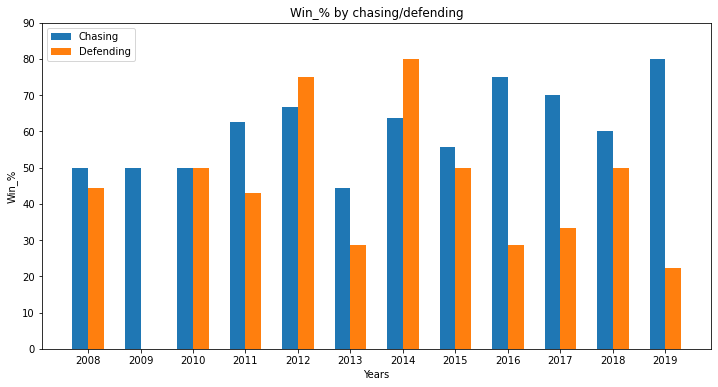

In [17]:
import importlib
importlib.reload(plt)

x=win_percentage['Season'].unique()
y=percent_won_chasing
z=percent_won_defending
X_axis = np.arange(len(x))
plt.figure(figsize=[12,6])
ax1 = plt.subplot()
ax1.set_ylim([0,90])
plt.bar(X_axis - 0.15, y, 0.3, label = 'Chasing')
plt.bar(X_axis + 0.15, z, 0.3, label = 'Defending')
plt.xticks(X_axis,x)
plt.xlabel("Years")
plt.ylabel("Win_%")
plt.title("Win_% by chasing/defending")
plt.legend()
plt.show()

# The bar chart above further solidifies our previous observation - KKR has struggled to defend their target (but they do have a respectable win record while chasing). Years 2009, 2016 and 2019 have particularly expressed this weakness.

In [18]:
favourable_toss=kkr_matches[kkr_matches['toss_winner']=="KKR"]
g=len(favourable_toss)
h=len(favourable_toss[favourable_toss['winner']=='KKR'])
win_prcnt_on_favorable_toss=round((h*100)/g,2)

unfavourable_toss=kkr_matches[kkr_matches['toss_winner']!="KKR"]
u=len(unfavourable_toss)
v=len(unfavourable_toss[unfavourable_toss['winner']=='KKR'])
win_prcnt_on_unfavorable_toss=round((v*100)/u,2)
print("Win % when toss won VS. toss lost:", win_prcnt_on_favorable_toss, "and", win_prcnt_on_unfavorable_toss)

Win % when toss won VS. toss lost: 57.61 and 45.35


# Regarding the toss, it is safe to assume KKR makes the right call. As expected usually for most teams at this level, KKR does have a higher win rate when they get the toss advantage.

In [19]:
m=favourable_toss.groupby('toss_decision').size().rename('Matches_played')
n=favourable_toss.groupby('toss_decision')['winner'].apply(lambda x: (x=='KKR').sum()).rename('Matches_won')
win_record_by_toss_decision=pd.concat([m, n],axis=1)
win_record_by_toss_decision["%_won"]=round(win_record_by_toss_decision['Matches_won']*100/win_record_by_toss_decision['Matches_played'],2)
win_record_by_toss_decision

,Matches_played,Matches_won,%_won
toss_decision,,,
bat,30,15,50.00
field,62,38,61.29


# No surprises here, KKR tends to field first if it's their call. Going with their strength.

In [20]:
k=unfavourable_toss.groupby('toss_decision').size().rename('Matches_played')
l=unfavourable_toss.groupby('toss_decision')['winner'].apply(lambda x: (x=='KKR').sum()).rename('Matches_won')
win_record_by_toss_lost=pd.concat([k, l],axis=1)
win_record_by_toss_lost["%_won"]=round(win_record_by_toss_lost['Matches_won']*100/win_record_by_toss_lost['Matches_played'],2)
win_record_by_toss_lost

,Matches_played,Matches_won,%_won
toss_decision,,,
bat,33,20,60.61
field,53,19,35.85


# An interesting observation follows - regardless of toss, KKR have managed to maintain the same win rate (around 60%) while chasing. This is a commendable feat. However, the worst case seems to be the ones where they lose the toss and have to bat first.

In [21]:
home_ground_records=kkr_matches[kkr_matches['city']=="Kolkata"]
w=len(home_ground_records)
x=home_ground_records[home_ground_records['winner']=='KKR']
len(x)
home_win_percentage=round((len(x)*100)/w,2)
home_win_percentage

60.81

In [22]:
away_ground_records=kkr_matches[kkr_matches['city']!="Kolkata"]
y=len(away_ground_records)
z=len(home_ground_records[home_ground_records['winner']=='KKR'])
away_win_percentage=round((z*100)/y,2)
away_win_percentage

43.27

# Playing at the home ground certainly bolsters the side's performance.

In [23]:
matches2=pd.read_csv('D:\\Data Science Projects\\IPL 2008-2019\\matches.csv')
matches2=matches2.drop(['date', 'result', 'dl_applied', 'player_of_match', 'win_by_runs', 'win_by_wickets', 'venue', 'umpire1', 'umpire2', 'umpire3'], axis=1)
matches2.head()

,id,season,city,team1,team2,toss_winner,toss_decision,winner
0,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad
1,2,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,Rising Pune Supergiant
2,3,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders
3,4,2017,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab
4,5,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,Royal Challengers Bangalore


In [24]:
kkr_matches2=matches2[(matches2['team1']=='Kolkata Knight Riders')|(matches2['team2']=='Kolkata Knight Riders')]

In [25]:
kkr_matches2=kkr_matches2.replace(['Delhi Daredevils','Delhi Capitals'],'Delhi Daredevils/Capitals')
kkr_matches2=kkr_matches2.replace(['Pune Warriors','Rising Pune Supergiant','Rising Pune Supergiants'],'Pune Warriors/Rising Pune Supergiants')
kkr_matches2=kkr_matches2.replace(['Deccan Chargers','Sunrisers Hyderabad'], 'Deccan Chargers/Sunrisers Hyderabad')
kkr_matches2.head()

,id,season,city,team1,team2,toss_winner,toss_decision,winner
2,3,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders
6,7,2017,Mumbai,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,Mumbai Indians
10,11,2017,Kolkata,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders
13,14,2017,Kolkata,Kolkata Knight Riders,Deccan Chargers/Sunrisers Hyderabad,Deccan Chargers/Sunrisers Hyderabad,field,Kolkata Knight Riders
17,18,2017,Delhi,Delhi Daredevils/Capitals,Kolkata Knight Riders,Delhi Daredevils/Capitals,bat,Kolkata Knight Riders


In [26]:
a=set(kkr_matches2['team1'])
a.remove('Kolkata Knight Riders')
a

{'Chennai Super Kings',
 'Deccan Chargers/Sunrisers Hyderabad',
 'Delhi Daredevils/Capitals',
 'Gujarat Lions',
 'Kings XI Punjab',
 'Kochi Tuskers Kerala',
 'Mumbai Indians',
 'Pune Warriors/Rising Pune Supergiants',
 'Rajasthan Royals',
 'Royal Challengers Bangalore'}

In [27]:
t=[]
mp=[]
w=[]
for i in a:
    t.append(i)
    kkr_vs_i=kkr_matches2[(kkr_matches2['team1']==i)|(kkr_matches2['team2']==i)]
    mp.append(len(kkr_vs_i))
    w.append(len(kkr_vs_i[kkr_vs_i['winner']=='Kolkata Knight Riders']))
print(t)
print(mp)
print(w)

['Kochi Tuskers Kerala', 'Chennai Super Kings', 'Royal Challengers Bangalore', 'Delhi Daredevils/Capitals', 'Gujarat Lions', 'Mumbai Indians', 'Rajasthan Royals', 'Kings XI Punjab', 'Pune Warriors/Rising Pune Supergiants', 'Deccan Chargers/Sunrisers Hyderabad']
[2, 20, 24, 23, 4, 25, 20, 25, 9, 26]
[0, 7, 14, 13, 1, 6, 10, 17, 7, 17]


In [28]:
records_against_other_teams=pd.DataFrame({'Teams':t, 'Matches_played':mp, 'Won':w})
records_against_other_teams      

,Teams,Matches_played,Won
0,Kochi Tuskers Kerala,2,0
1,Chennai Super Kings,20,7
2,Royal Challengers Bangalore,24,14
3,Delhi Daredevils/Capitals,23,13
4,Gujarat Lions,4,1
5,Mumbai Indians,25,6
6,Rajasthan Royals,20,10
7,Kings XI Punjab,25,17
8,Pune Warriors/Rising Pune Supergiants,9,7
9,Deccan Chargers/Sunrisers Hyderabad,26,17


In [29]:
records_against_other_teams['Win_%']=round((records_against_other_teams['Won']*100)/records_against_other_teams['Matches_played'],2)
records_against_other_teams

,Teams,Matches_played,Won,Win_%
0,Kochi Tuskers Kerala,2,0,0.00
1,Chennai Super Kings,20,7,35.00
2,Royal Challengers Bangalore,24,14,58.33
3,Delhi Daredevils/Capitals,23,13,56.52
4,Gujarat Lions,4,1,25.00
5,Mumbai Indians,25,6,24.00
6,Rajasthan Royals,20,10,50.00
7,Kings XI Punjab,25,17,68.00
8,Pune Warriors/Rising Pune Supergiants,9,7,77.78
9,Deccan Chargers/Sunrisers Hyderabad,26,17,65.38


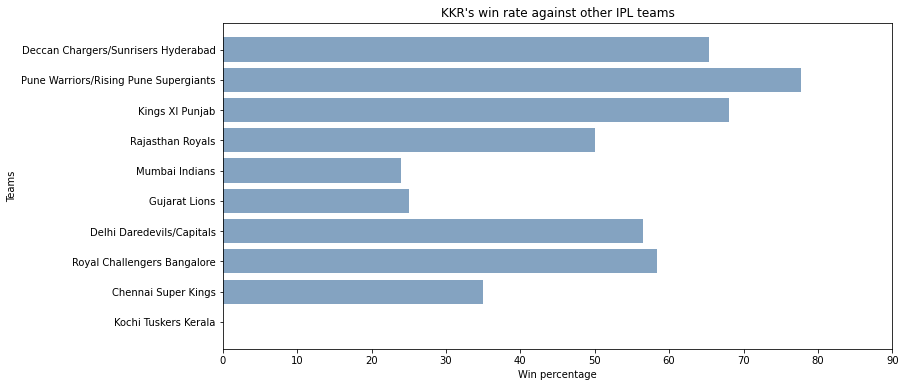

In [30]:
plt.figure(figsize=[12,6])
ax1 = plt.subplot()
ax1.set_xlim([0,90])
plt.barh(records_against_other_teams['Teams'], records_against_other_teams['Win_%'], color=(0.2, 0.4, 0.6, 0.6))
plt.title('KKR\'s win rate against other IPL teams')
plt.ylabel('Teams')
plt.xlabel('Win percentage')
plt.show()

# Finally, to conclude, we look at the performance teamwise - KKR hasn't won a single game against Kochi and has the highest win percentage against Pune. But these teams haven't been around for a long time. For the sake of consistency, if we consider at least 20 matches played, KKR has Mumbai as their most challenging rival, but on the plus side, their record against Hyderabad and Punjab has been impressive so far.